In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_json('./TTWOFullOptionChain.json')
plt.style.use('fivethirtyeight')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

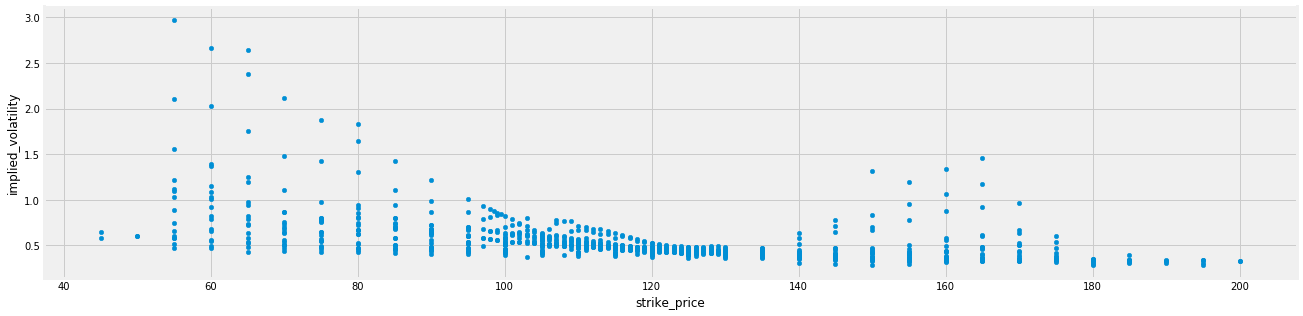

In [2]:
df.plot.scatter('strike_price', 'implied_volatility', figsize=(20,5))

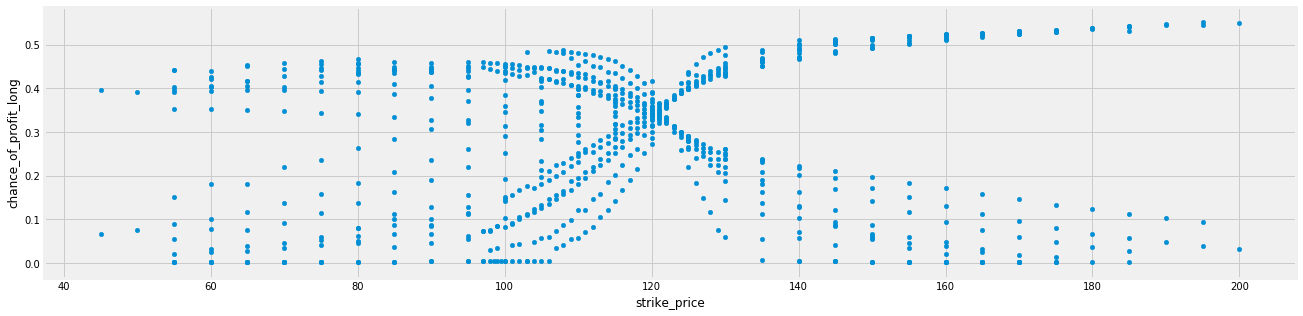

In [3]:
df.plot.scatter('strike_price', 'chance_of_profit_long', figsize=(20,5))

In [4]:
df['product'] = df.apply(lambda row: (row['chance_of_profit_short']/row['implied_volatility']), axis=1)

In [5]:
dfcall = df[df['type'] == 'call']
chance_profit = dfcall['chance_of_profit_long'].describe()['75%']

In [6]:
chance_profit_low_iv = dfcall[dfcall['chance_of_profit_long'] > chance_profit]['implied_volatility'].describe()['25%']

In [7]:
max_profit = dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)]['adjusted_mark_price'].max()

In [8]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv) & (dfcall['adjusted_mark_price'] == max_profit)]

,adjusted_mark_price,ask_price,ask_size,bid_price,bid_size,break_even_price,chance_of_profit_long,chance_of_profit_short,delta,expiration_date,...,previous_close_date,previous_close_price,rho,strike_price,theta,type,url,vega,volume,product
2463,37.4,38.7,7,36.1,21,122.4,0.449934,0.550066,0.960942,2020-06-19,...,2020-04-03,34.4,0.161701,85.0,-0.015539,call,https://api.robinhood.com/options/instruments/...,0.046399,0,1.133685


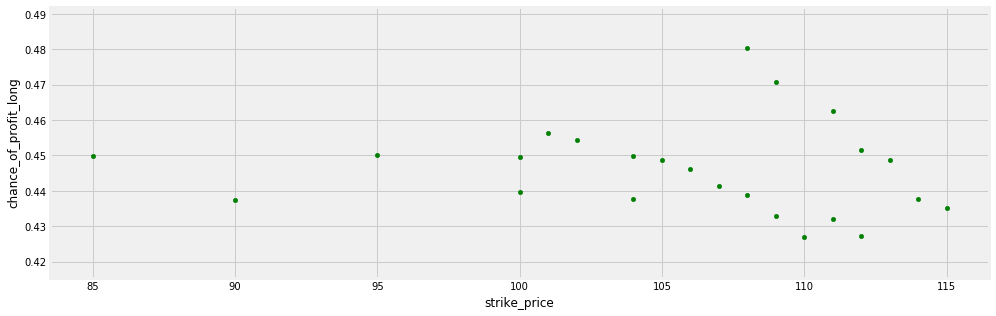

In [9]:

dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'chance_of_profit_long', figsize=(15,5), c='green')

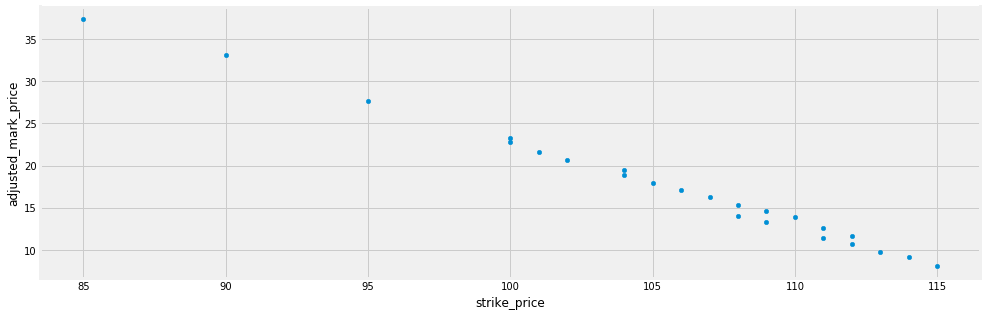

In [10]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'adjusted_mark_price', figsize=(15,5))

In [12]:
dfcall[(dfcall['strike_price'] > 105) & (dfcall['strike_price'] < 112)][['adjusted_mark_price', 'strike_price', 'expiration_date', 'volume', 'chance_of_profit_long', 'implied_volatility']].sort_values('chance_of_profit_long', ascending=False).head(10)

,adjusted_mark_price,strike_price,expiration_date,volume,chance_of_profit_long,implied_volatility
657,13.95,108.0,2020-04-09,0,0.487412,0.601709
654,15.95,106.0,2020-04-09,0,0.486158,0.682193
684,13.00,109.0,2020-04-09,0,0.483830,0.655474
689,15.00,107.0,2020-04-09,0,0.482722,0.745707
685,12.05,110.0,2020-04-09,0,0.480987,0.668142
247,14.05,108.0,2020-04-17,0,0.480350,0.397188
664,11.10,111.0,2020-04-09,0,0.478309,0.663613
243,13.25,109.0,2020-04-17,0,0.470838,0.456675
236,11.45,111.0,2020-04-17,0,0.462611,0.454374
751,12.70,110.0,2020-04-17,0,0.454545,0.546267
